In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("mediacompany.csv")

In [3]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


# Checking Duplicates

In [4]:
sum(df.duplicated(subset='Date'))==0

True

In [5]:
df=df.drop('Unnamed: 7',axis=1)

In [6]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


# Data Inspection

In [7]:
df.shape

(80, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [9]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [10]:
df.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = False )

In [12]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [13]:
df['Day_Of_Week']=df['Date'].dt.dayofweek

In [14]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Of_Week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


# Exploratory Data Analysis

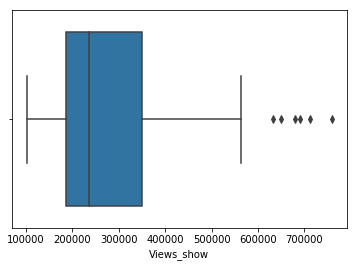

In [15]:
sns.boxplot(df['Views_show'])

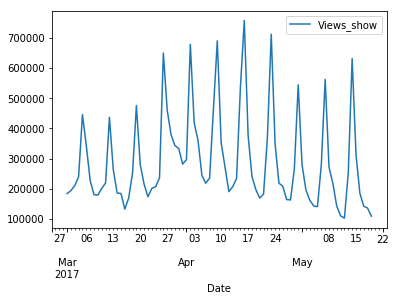

In [16]:
df.plot.line(x='Date',y='Views_show')

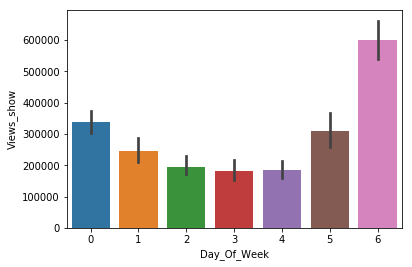

In [17]:
sns.barplot(data=df,x="Day_Of_Week",y="Views_show")

# we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days

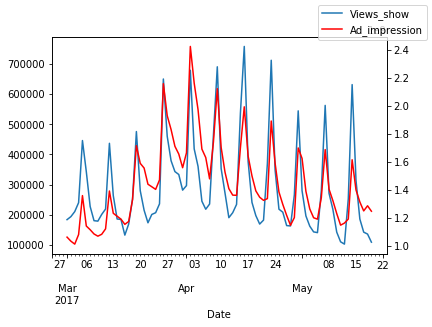

In [18]:
ax = df.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
df.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()

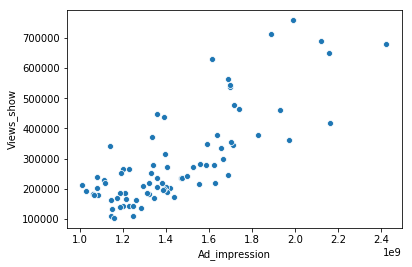

In [19]:
sns.scatterplot(data=df,x="Ad_impression",y="Views_show")

# we can see that the views as well as ad impressions show a weekly pattern.

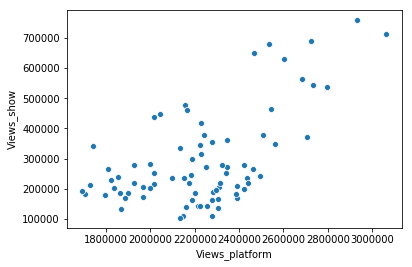

In [20]:
sns.scatterplot(data=df,x='Views_platform', y = 'Views_show')

Show views are some what proportionately related to Platform views

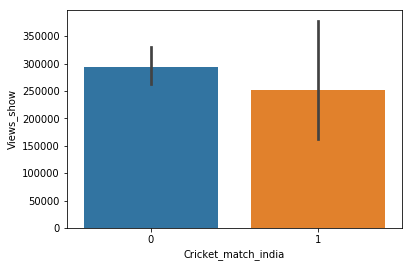

In [21]:
sns.barplot(data=df,x='Cricket_match_india', y='Views_show')

 Show views slightly declines when there is a cricket match.

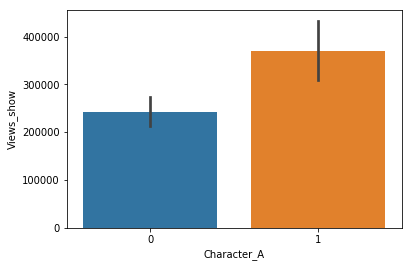

In [22]:
sns.barplot(data = df,x='Character_A', y='Views_show')

 Presence of Character A improves the show viewership.

# Model building

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [26]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Of_Week
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6


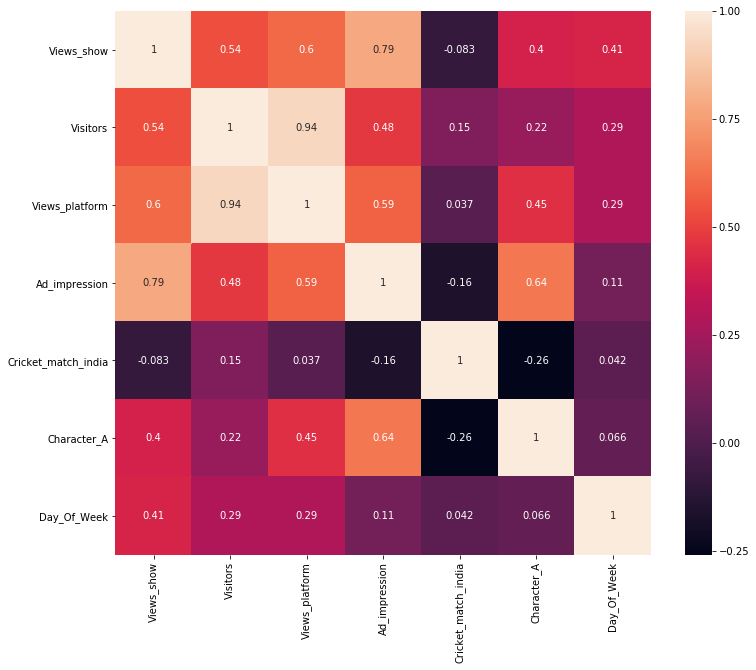

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
di = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
df['weekend'] = df['Day_Of_Week'].map(di)

In [29]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Of_Week,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1


In [30]:
X=df[["Visitors","weekend"]]
y=df["Views_show"]

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm=LinearRegression()

In [33]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
import statsmodels.api as sm

In [35]:
X=sm.add_constant(X)
lm_1=sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           2.51e-12
Time:                        20:28:46   Log-Likelihood:                 30.210
No. Observations:                  80   AIC:                            -54.42
Df Residuals:                      77   BIC:                            -47.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0770      0.042      1.826      0.0

Visitors as well as weekend column are significant.

In [36]:
X=df[["Visitors","weekend","Character_A"]]
y=df["Views_show"]

In [37]:
X=sm.add_constant(X)
lm_2=sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        20:28:47   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      

In [38]:
df['Lag_Views'] = np.roll(df['Views_show'], 1)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Of_Week,weekend,Lag_Views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.009817
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


In [39]:
df.Lag_Views[0]=0

In [40]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Of_Week,weekend,Lag_Views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.000000
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


In [41]:
X=df[["Visitors","weekend","Character_A","Lag_Views"]]
y=df["Views_show"]

In [42]:
X=sm.add_constant(X)
lm_3=sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     54.94
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.48e-21
Time:                        20:28:48   Log-Likelihood:                 57.207
No. Observations:                  80   AIC:                            -104.4
Df Residuals:                      75   BIC:                            -92.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0149      0.032     -0.460      

visitor insignificant.

In [43]:
X = df[['weekend','Character_A','Views_platform']]
y=df["Views_show"]


In [44]:
X=sm.add_constant(X)
lm_4=sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           3.59e-15
Time:                        20:28:48   Log-Likelihood:                 39.264
No. Observations:                  80   AIC:                            -70.53
Df Residuals:                      76   BIC:                            -61.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0485      0.036      1.

In [45]:
X = df[['weekend','Character_A',"Visitors"]]
y=df["Views_show"]

In [46]:
X=sm.add_constant(X)
lm_5=sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        20:28:48   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      

In [47]:
X = df[['weekend','Character_A',"Visitors","Ad_impression"]]
y=df["Views_show"]

In [48]:
X=sm.add_constant(X)
lm_6=sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.10e-25
Time:                        20:28:48   Log-Likelihood:                 67.431
No. Observations:                  80   AIC:                            -124.9
Df Residuals:                      75   BIC:                            -113.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0064      0.028     -0.229

In [49]:
X = df[['weekend','Character_A',"Ad_impression"]]
y=df["Views_show"]

In [51]:
X=sm.add_constant(X)
lm_7=sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        20:52:19   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.021     -0.015

In [52]:
df['ad_impression_million'] = df['Ad_impression']/1000000

In [53]:
X =df[['weekend','Character_A','ad_impression_million','Cricket_match_india']]
y=df["Views_show"]


In [54]:
X=sm.add_constant(X)
lm_8=sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.02e-25
Time:                        20:54:03   Log-Likelihood:                 67.508
No. Observations:                  80   AIC:                            -125.0
Df Residuals:                      75   BIC:                            -113.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [55]:
X = df[['weekend','Character_A','ad_impression_million']]
y=df["Views_show"]

In [57]:
X=sm.add_constant(X)
lm_9=sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        20:56:26   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

# Making predictions using the model

In [58]:
X = df[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_9.predict(X)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df.Views_show, Predicted_views)
r_squared = r2_score(df.Views_show, Predicted_views)


In [60]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010866088433646177
r_square_value : 0.802643446857565


# Actual vs Predicted

Text(0, 0.5, 'Views')

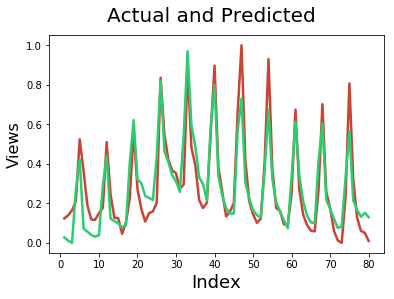

In [66]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show, color="#CB4335", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="#2ECC71",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)     

# Error Plot

Text(0, 0.5, 'Views_show-Predicted_views')

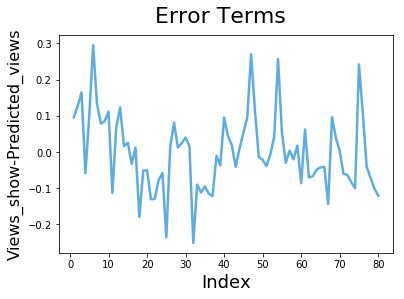

In [67]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="#5DADE2", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=22)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Views_show-Predicted_views', fontsize=16) 

Making predictions using lm_5

In [68]:
X = df[['weekend','Character_A',"Visitors"]]
X =sm.add_constant(X)
Predicted_views=lm_5.predict(X)

In [70]:
mse = mean_squared_error(df.Views_show, Predicted_views)
r_squared = r2_score(df.Views_show, Predicted_views)

In [71]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.022801047640331872
r_square_value : 0.585873408097934


Text(0, 0.5, 'Views')

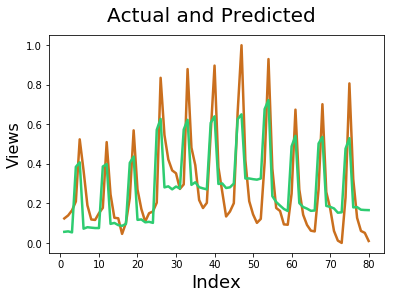

In [73]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show, color="#CA6F1E", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="#2ECC71",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)    

# Error plot

Text(0, 0.5, 'Views_show-Predicted_views')

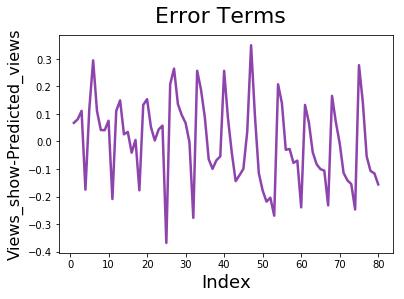

In [74]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="#8E44AD", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=22)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Views_show-Predicted_views', fontsize=16) 

Ad Impressions and Character A as the driver variables that could explain the viewership pattern. Based on industry experience, ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly, Character A’s absence and presence created a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership.